# Laboratório de Fluídos & Termodinâmica

## Tempo de escoamento de um fluído

* Aluno: Gabriel Wendell Celestino Rocha
* Matrícula: 20190112149 

* Professor: João Medeiros de Araujo.
* Data: 18/03/2021

### Bibliotecas utilizadas

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

%matplotlib notebook

Para melhorar a estética dos plots:

In [2]:
def opt_plot():
    plt.grid(True, linestyle=":", color='0.50')
    plt.minorticks_on()
    plt.tick_params(axis='both', which='minor', direction='in', top=True, right=True, length=5, width=1, labelsize=15)
    plt.tick_params(axis='both', which='major', direction='in', top=True, right=True, length=8, width=1, labelsize=15)

## 1. Modelo simples

In [3]:
g = 9.81
r = 0.35*1e2
R = 4.5*1e2
H = 21.1*1e2
h0 = 10.35*1e2

A equação que iremos utilizar é:

$$\boxed{\Delta t=\frac{\sqrt{H}-\sqrt{h_{0}}\cdot\sqrt{2g(R^{4}-r^{4})}}{r^{2}g}}$$

In [4]:
print(r/R)

0.07777777777777778


Se $\frac{r}{R}<0.1$, então:

$$\boxed{\Delta t=\frac{(\sqrt{H}-\sqrt{h_{0}})R^{2}\sqrt{2}}{r^{2}\sqrt{g}}}$$

In [5]:
def flow_time(H,h0,R,r):
    g = 9.81
    
    return np.abs((np.sqrt(H)-np.sqrt(h0)*np.sqrt(2*g*(R**4-r**4)))/g*r**2)/1e8

In [6]:
print('t = ', flow_time(H,h0,R,r),'s')

t =  36.033226141856325 s


### Lendo os dados

In [7]:
time = pd.read_excel('ExpDataTime.xlsx')
time

,Exp.,T
0,1,36.25
1,2,36.55
2,3,36.27
3,4,36.57
4,5,36.23
5,Sigma,0.00


* $[T]$ = s

### Desvio padrão

$$\boxed{\sigma=\sqrt{\frac{1}{N}\sum_{i=1}^{n}(x_{i}-\mu)^{2}}}$$

In [8]:
time['T'][5] = np.std(time['T'][0:5])
time

c:\users\gabriel wendell\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,Exp.,T
0,1,36.250000
1,2,36.550000
2,3,36.270000
3,4,36.570000
4,5,36.230000
5,Sigma,0.152525


In [9]:
t = np.mean(time['T'][0:5])

print('t =',t, '+/-', time['T'][5], 's')

t = 36.373999999999995 +/- 0.15252540771950054 s


### Erro relativo percentual

$$\boxed{\%Error=\frac{|\text{estimative}-\text{actual}|}{\text{actual}}\cdot100}$$

In [10]:
def Error_perc(est, act):
    return (np.abs(est-act)/act)*100

In [11]:
Err_time = Error_perc(flow_time(H,h0,R,r), t)

print('Erro relativo percentual =', Err_time, '%')

Erro relativo percentual = 0.9368611044803167 %


### Coeficiente de variação

$$\boxed{CV=\frac{\sigma}{\mu}\cdot100}$$

* $CV\leq15\%$: Baixa dispersão (dados homogêneos)
* $15\%<CV<30\%$: Média dispersão
* $CV\geq30\%$: Alta dispersão (dados heterogêneos)

In [12]:
def CV(sigma,mu):
    return (sigma/mu)*100

In [13]:
CV_time = CV(time['T'][5], t)

print('CV =', CV_time, '%')

CV = 0.419325363500029 %


### Margem de erro

$$\boxed{E=1,96\cdot\frac{\sigma}{N}}$$

In [14]:
def E(sigma, N):
    return 1.96*(sigma/N)

In [15]:
E_time = E(time['T'][5], 5)

print('E =', E_time)

E = 0.05978995982604421


In [16]:
time

,Exp.,T
0,1,36.250000
1,2,36.550000
2,3,36.270000
3,4,36.570000
4,5,36.230000
5,Sigma,0.152525


### Bônus

In [17]:
data = pd.read_excel('ExpData.xlsx')
data

,Exp.,H,D
0,1,21.0,17.0
1,1,20.0,16.0
2,1,19.0,15.0
3,1,18.0,14.0
4,1,17.0,13.0
...,...,...,...
80,5,12.0,4.5
81,5,11.7,4.0
82,5,11.0,3.0
83,5,10.7,2.0


* $[H]=[D]=\text{cm}$

In [18]:
N = len(data) - 1
H = 21.1
h0 = 10.35 
data['delta_H'] = data['H'] - h0

In [19]:
data.sort_values(by='H', inplace=True)
data

,Exp.,H,D,delta_H
84,5,10.4,1.0,0.05
48,3,10.4,1.0,0.05
30,2,10.5,1.0,0.15
67,4,10.5,1.0,0.15
12,1,10.5,1.0,0.15
...,...,...,...,...
50,4,21.0,17.0,10.65
31,3,21.0,17.0,10.65
0,1,21.0,17.0,10.65
13,2,21.4,18.0,11.05


<IPython.core.display.Javascript object>


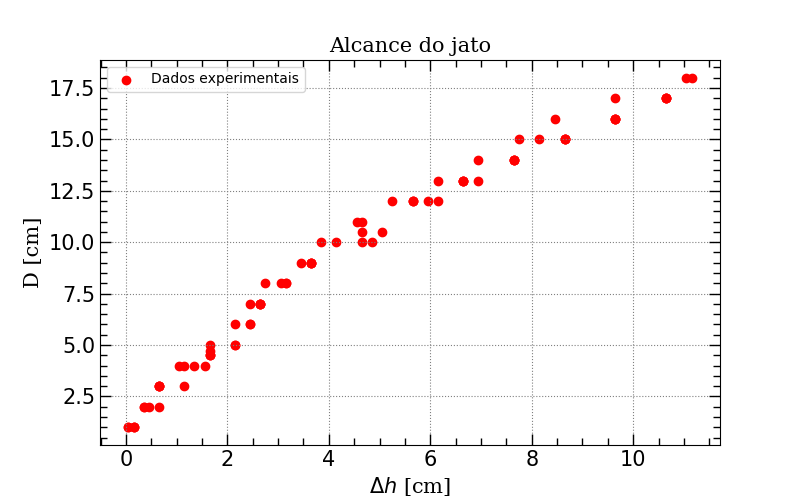

In [20]:
plt.figure(figsize=(8,5))
plt.scatter(data['delta_H'], data['D'], color='red', label='Dados experimentais')
plt.title('Alcance do jato', family='serif', fontsize=15)
plt.xlabel(r'$\Delta h$ [cm]', family='serif', fontsize=15)
plt.ylabel('D [cm]', family='serif', fontsize=15)
plt.legend(loc='best')
opt_plot()

In [21]:
data['x'] = np.sqrt(h0*data['delta_H'])
data

,Exp.,H,D,delta_H,x
84,5,10.4,1.0,0.05,0.719375
48,3,10.4,1.0,0.05,0.719375
30,2,10.5,1.0,0.15,1.245994
67,4,10.5,1.0,0.15,1.245994
12,1,10.5,1.0,0.15,1.245994
...,...,...,...,...,...
50,4,21.0,17.0,10.65,10.498929
31,3,21.0,17.0,10.65,10.498929
0,1,21.0,17.0,10.65,10.498929
13,2,21.4,18.0,11.05,10.694274


$$\boxed{D=2\sqrt{\frac{h_{0}\Delta h}{1-\frac{r^{2}}{R^{2}}}}}$$

In [22]:
r = 0.35
R = 4.5
g = 9.81

norm = np.sqrt(1-(r/R)**2)
norm

0.9969707203744504

In [23]:
data['D_theo'] = 2*np.sqrt(h0*data['delta_H'])*(1./norm)
data

,Exp.,H,D,delta_H,x,D_theo
84,5,10.4,1.0,0.05,0.719375,1.443121
48,3,10.4,1.0,0.05,0.719375,1.443121
30,2,10.5,1.0,0.15,1.245994,2.499559
67,4,10.5,1.0,0.15,1.245994,2.499559
12,1,10.5,1.0,0.15,1.245994,2.499559
...,...,...,...,...,...,...
50,4,21.0,17.0,10.65,10.498929,21.061659
31,3,21.0,17.0,10.65,10.498929,21.061659
0,1,21.0,17.0,10.65,10.498929,21.061659
13,2,21.4,18.0,11.05,10.694274,21.453537


<IPython.core.display.Javascript object>


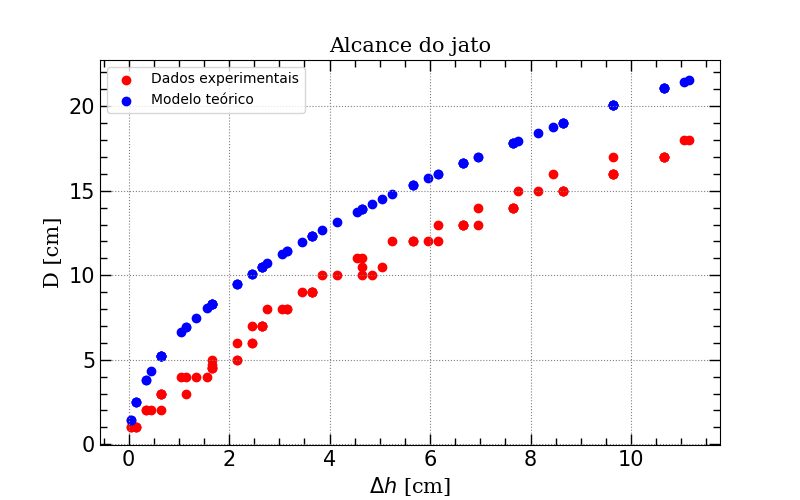

In [24]:
plt.figure(figsize=(8,5))
plt.scatter(data['delta_H'], data['D'], color='red', label='Dados experimentais')
plt.scatter(data['delta_H'], data['D_theo'], color='blue', label='Modelo teórico')
plt.title('Alcance do jato', family='serif', fontsize=15)
plt.xlabel(r'$\Delta h$ [cm]', family='serif', fontsize=15)
plt.ylabel('D [cm]', family='serif', fontsize=15)
plt.legend(loc='best')
opt_plot()

$$\boxed{v=\sqrt{\frac{2g\Delta h}{1-\frac{r^{2}}{R^{2}}}}}$$

* $[v]=\text{m}\cdot{s}^{-1}$

In [25]:
r = 0.035
R = 0.21

data['v'] = np.sqrt(2*g*data['delta_H'])*(1/norm)
data

,Exp.,H,D,delta_H,x,D_theo,v
84,5,10.4,1.0,0.05,0.719375,1.443121,0.993464
48,3,10.4,1.0,0.05,0.719375,1.443121,0.993464
30,2,10.5,1.0,0.15,1.245994,2.499559,1.720730
67,4,10.5,1.0,0.15,1.245994,2.499559,1.720730
12,1,10.5,1.0,0.15,1.245994,2.499559,1.720730
...,...,...,...,...,...,...,...
50,4,21.0,17.0,10.65,10.498929,21.061659,14.499129
31,3,21.0,17.0,10.65,10.498929,21.061659,14.499129
0,1,21.0,17.0,10.65,10.498929,21.061659,14.499129
13,2,21.4,18.0,11.05,10.694274,21.453537,14.768903


<IPython.core.display.Javascript object>


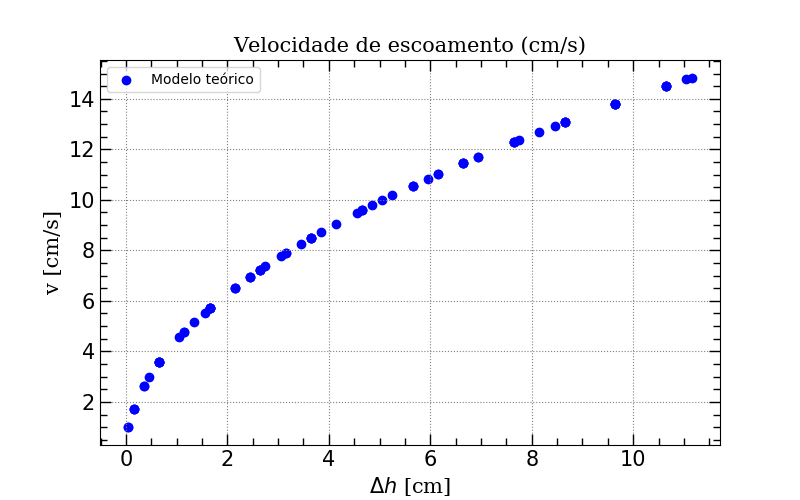

In [26]:
plt.figure(figsize=(8,5))
plt.scatter(data['delta_H'], data['v'], color='blue', label='Modelo teórico')
plt.title('Velocidade de escoamento (cm/s)', family='serif', fontsize=15)
plt.xlabel(r'$\Delta h$ [cm]', family='serif', fontsize=15)
plt.ylabel('v [cm/s]', family='serif', fontsize=15)
plt.legend(loc='best')
opt_plot()

## 2. Modelo com viscosidade

In [27]:
g = 9.81
r = 0.35*1e2
R = 4.5*1e2
H = 21.1*1e2
h0 = 10.35*1e2

L = 1.1
eta = 1.002*1e-3
rho_w = 997.0

* $[g]=\text{m}\cdot\text{s}^{-2}$
* $[r]=[R]=[L]=\text{m}$
* $[\eta]=\text{Pa}\cdot\text{s}^{-1}$
* $[\rho_{water}]=\text{kg}\cdot\text{m}^{-3}$

$$\boxed{\sqrt{H+b^{2}}-\sqrt{h_{0}+b^{2}}+b\ln{\Bigg[\frac{\sqrt{H+b^{2}}-b}{\sqrt{h_{0}+b^{2}}-b}\Bigg]}=\sqrt{\frac{gr^{4}}{2(R^{4}-r^{4})}}\cdot\Delta t}$$

$$\text{onde, }\text{ }b=\frac{8L\eta R^{4}}{\rho r^{2}\sqrt{2g(R^{4}-r^{4})}}$$

In [28]:
def norm_visc(L,eta,rho,R,r,g):
    return (8*L*eta*R**4)/(rho_w*r**2*np.sqrt(2*g*(R**4-r**4)))

In [29]:
print('b/H =', norm_visc(L,eta,rho_w,R,r,g)/H)
print('b/h0 =', norm_visc(L,eta,rho_w,R,r,g)/h0)

b/H = 1.564300427737876e-07
b/h0 = 3.189056910654027e-07


Se $\frac{b}{h_{i}}<<1$, então:

$$\boxed{\sqrt{H}+2b\ln{(\sqrt{H})}=\sqrt{h_{0}}+2b\ln{\sqrt{h_{0}}}+\frac{r^{2}}{R^{2}}\sqrt{\frac{g}{2}}\cdot\Delta t}$$

A equação acima é a equação que iremos utilizar!

In [30]:
def flow_time_visc_approx(H,h0,b,r,R,g):
    return (np.sqrt(H)+2*b*np.log(np.sqrt(H))-np.sqrt(h0)-2*b*np.log(np.sqrt(h0)))*(R/r)**2*np.sqrt(2/g)

In [31]:
t_visc = flow_time_visc_approx(H,h0,norm_visc(L,eta,rho_w,R,r,g),r,R,g)

print('t =', t_visc, 's =', t_visc/60, 'min')

t = 1027.306586039812 s = 17.121776433996864 min


### Lendo os dados

In [32]:
time2 = pd.read_excel('Exp2DataTime.xlsx')
time2

,Exp.,T
0,1,1027.52
1,2,1027.12
2,3,1028.57
3,4,1028.36
4,5,1027.35
5,Sigma,0.00


* $[T]=\text{s}$

### Desvio padrão

In [33]:
time2['T'][5] = np.std(time2['T'][0:5])
time2

c:\users\gabriel wendell\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,Exp.,T
0,1,1027.520000
1,2,1027.120000
2,3,1028.570000
3,4,1028.360000
4,5,1027.350000
5,Sigma,0.574199


In [34]:
t2 = np.mean(time2['T'][0:5])

print('t =',t2, '+/-', time2['T'][5], 's')

t = 1027.784 +/- 0.5741985719243855 s


### Erro relativo percentual

In [35]:
Err_time2 = Error_perc(t_visc, t2)

print('Erro relativo percentual =', Err_time2, '%')

Erro relativo percentual = 0.04645080680261485 %


In [36]:
print(Err_time-Err_time2, '%')

0.8904102976777019 %


### Coeficiente de variação

In [37]:
CV_time2 = CV(time2['T'][5], t2)

print('CV =', CV_time2, '%')

CV = 0.05586763093455292 %


Os dados coletados são homogêneos!

### Margem de erro

In [38]:
E_time2 = E(time2['T'][5], 5)

print('E =', E_time2)

E = 0.22508584019435912


In [39]:
time2

,Exp.,T
0,1,1027.520000
1,2,1027.120000
2,3,1028.570000
3,4,1028.360000
4,5,1027.350000
5,Sigma,0.574199


### Bônus

$$\boxed{v_{m}=\sqrt{2gh_{0}+\frac{64L^{2}\eta^{2}}{\rho^{2}r^{4}}}-\frac{8L\eta}{\rho r^{2}}}$$

$[v_{m}]=\text{m}\cdot\text{s}^{-1}$

In [40]:
def vm_visc(L,r,h0,eta,rho,g):    
    return (np.sqrt(2*g*h0+(64*L**2*eta**2/r**4*rho**2))-(8*L*eta/rho*r**2))*1e-3

In [41]:
v_m = vm_visc(L,r,h0,eta,rho_w,g)

print('v =', v_m, 'm/s')

v = 0.142490745057139 m/s


$\blacksquare$

![image](https://media.giphy.com/media/xUPOqo6E1XvWXwlCyQ/giphy.gif)